In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2022/players.csv
/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv
/kaggle/input/nfl-big-data-bowl-2022/games.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv
/kaggle/input/nfl-big-data-bowl-2022/plays.csv


In [2]:
# read in scouting data, plays data, tracking 2020 data
scout_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv')
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/plays.csv')
track = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv')

In [3]:
# joining plays_df and scout_df on a specific game
buf_mia = plays_df[plays_df.gameId == 2021010300].join(scout_df[scout_df.gameId == 2021010300].set_index('playId'), 
                                                       on='playId', how='left', rsuffix='_scout')
# focusing on punt plays
bm_punts = buf_mia[buf_mia.specialTeamsPlayType == 'Punt']
# creating arrays of data I will use later while plotting
punt_ids = np.array(bm_punts['playId'])
results = np.array(bm_punts['specialTeamsResult'])
kick_types = np.array(bm_punts['kickType'])
kick_teams = np.array(bm_punts['possessionTeam'])
titles = np.array(list(zip(punt_ids, results, kick_types, kick_teams)))
titles

array([['548', 'Touchback', 'N', 'BUF'],
       ['675', 'Downed', 'N', 'MIA'],
       ['782', 'Out of Bounds', 'A', 'BUF'],
       ['867', 'Out of Bounds', 'N', 'MIA'],
       ['1232', 'Fair Catch', 'R', 'MIA'],
       ['1586', 'Return', 'N', 'MIA'],
       ['2217', 'Downed', 'A', 'MIA'],
       ['2755', 'Out of Bounds', 'A', 'BUF'],
       ['4075', 'Muffed', 'N', 'BUF']], dtype='<U21')

In [4]:
# narrowing the tracking data down to match the game data created above
bm_track = track[track['gameId'] == 2021010300]
bm_track = bm_track[bm_track['playId'].isin(punt_ids)].fillna(0)
    
bm_track['team'] = bm_track['team'].map({'home': 'BUF', 'away': 'MIA', 'football': 'FB'})
bm_track['jerseyNumber'] = bm_track['jerseyNumber'].apply(lambda x: int(x))

bm_track.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
5175,2021-01-03T18:26:55.700,51.28,28.98,0.0,0.0,0.0,66.20,113.15,None,40096.0,A.J. Klein,54,OLB,BUF,1,2021010300,548,right
5176,2021-01-03T18:26:55.800,51.28,28.98,0.0,0.0,0.0,66.20,108.72,None,40096.0,A.J. Klein,54,OLB,BUF,2,2021010300,548,right
5177,2021-01-03T18:26:55.900,51.28,28.98,0.0,0.0,0.0,66.20,106.95,None,40096.0,A.J. Klein,54,OLB,BUF,3,2021010300,548,right
5178,2021-01-03T18:26:56.000,51.28,28.98,0.0,0.0,0.0,66.20,103.96,None,40096.0,A.J. Klein,54,OLB,BUF,4,2021010300,548,right
5179,2021-01-03T18:26:56.100,51.29,28.98,0.0,0.0,0.0,66.93,98.77,None,40096.0,A.J. Klein,54,OLB,BUF,5,2021010300,548,right


In [5]:
# Player data for this game
players = np.array(pd.DataFrame(bm_track.groupby(['team', 'position', 'displayName', 'jerseyNumber']))[0])
players = sorted(players, key=lambda x: (x[0], x[1], x[2]))

print('Special Teams Punt Roster for game #2021010300 -- Miami AT Buffalo\n')
print('TEAM - POS - PLAYER NAME - JERSEY #\n')
for player in players:
    print(' - '.join(str(i) for i in player))

Special Teams Punt Roster for game #2021010300 -- Miami AT Buffalo

TEAM - POS - PLAYER NAME - JERSEY #

BUF - CB - Dane Jackson - 30
BUF - CB - Josh Norman - 29
BUF - CB - Levi Wallace - 39
BUF - CB - Siran Neal - 33
BUF - CB - Taron Johnson - 24
BUF - DE - A.J. Epenesa - 57
BUF - DE - Darryl Johnson - 92
BUF - DE - Trent Murphy - 93
BUF - DT - Justin Zimmer - 61
BUF - DT - Quinton Jefferson - 90
BUF - FS - Jaquan Johnson - 46
BUF - ILB - Andre Smith - 59
BUF - LS - Reid Ferguson - 69
BUF - MLB - Tremaine Edmunds - 49
BUF - MLB - Tyler Matakevich - 44
BUF - MLB - Tyrel Dodson - 53
BUF - OLB - A.J. Klein - 54
BUF - OLB - Matt Milano - 58
BUF - P - Corey Bojorquez - 9
BUF - SS - Dean Marlowe - 31
BUF - SS - Jordan Poyer - 21
BUF - WR - Isaiah McKenzie - 19
FB - 0 - football - 0
MIA - CB - Jamal Perry - 33
MIA - CB - Noah Igbinoghene - 23
MIA - DB - Nate Holley - 36
MIA - DE - Christian Wilkins - 94
MIA - DE - Emmanuel Ogbah - 91
MIA - DE - Shaq Lawson - 90
MIA - DE - Zach Sieler - 92
MI

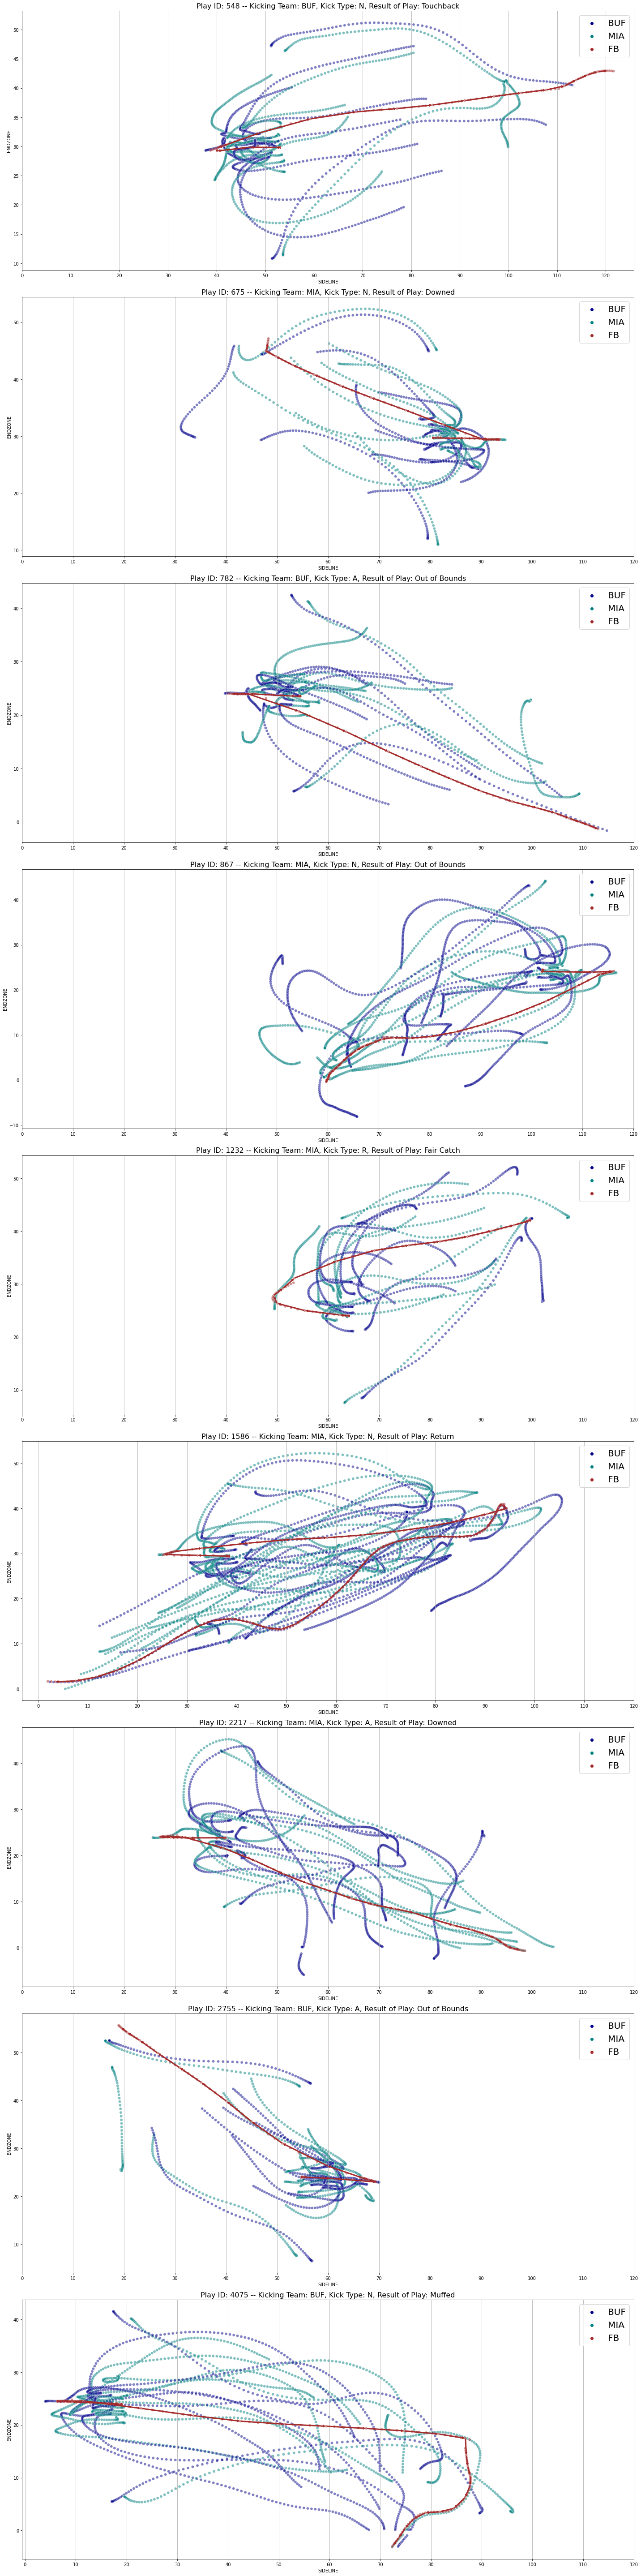

In [6]:
# this function plots all of the plays on separate axes, highlighting the movement of the football during the play
# the title of each plot has extra information about the play

def plot_punts(df, titles):
    
    fig, ax = plt.subplots(len(titles), 1, figsize=(20, 80))
    ax = ax.flatten()
    
    for i, j in zip(titles, ax):

        mask = (df['playId'] == int(i[0]))
        
        x_val = df[mask]['x'].values
        y_val = df[mask]['y'].values
        hue = df[mask]['team']
        
        sns.scatterplot(x=x_val, y=y_val, hue=hue, ax=j, alpha=0.5, palette=['darkblue', 'teal', 'brown'])
        
        #j.set_facecolor('darkgreen')
        j.set_xticks(list(range(0, 121, 10)))
        j.set_title(f'Play ID: {i[0]} -- Kicking Team: {i[3]}, Kick Type: {i[2]}, Result of Play: {i[1]}', size=16)
        j.set_xlabel('SIDELINE')
        j.set_ylabel('ENDZONE')
        j.grid(axis='x')
        j.legend(prop={'size': 20})
        
        xycoords = list(zip(x_val, y_val, hue))

        for xy in range(0, len(xycoords) - 5, 5):
            if xycoords[xy][2] == 'FB':
                j.annotate('', xy=(xycoords[xy + 5][0], xycoords[xy + 5][1]), 
                            xycoords='data', 
                            xytext=(xycoords[xy][0], xycoords[xy][1]), 
                            textcoords='data',
                            arrowprops=dict(arrowstyle='simple', color='brown'),)
        
    plt.tight_layout()
    
plot_punts(bm_track, titles)